# Point Cloud-to-Graph Random Walks Lifting Tutorial

***
This notebook shows how to import a dataset, with the desired lifting, and how to run a neural network using the loaded data.
***


## Imports and utilities

In [1]:
%load_ext autoreload
%autoreload 2
from modules.data.load.loaders import PointCloudLoader
from modules.data.preprocess.preprocessor import PreProcessor
from modules.utils.utils import (
    plot_2d_point_cloud,
    load_dataset_config,
    load_model_config,
    load_transform_config,
    describe_data,
    plot_graph_data,
)

## Loading the Dataset

Here we just need to spicify the name of the available dataset that we want to load. First, the dataset config is read from the corresponding yaml file (located at `/configs/datasets/` directory), and then the data is loaded via the implemented `Loaders`.


In [2]:
dataset_name = "random_walks"
dataset_config = load_dataset_config(dataset_name)

loader = PointCloudLoader(dataset_config)

dataset = loader.load()
dataset[0]


Dataset configuration for random_walks:

{'data_domain': 'pointcloud',
 'data_type': 'toy_dataset',
 'data_name': 'random_points',
 'data_dir': 'datasets/pointcloud/toy_dataset',
 'task': 'classification',
 'loss_type': 'cross_entropy',
 'monitor_metric': 'accuracy',
 'num_features': 10,
 'num_classes': 3,
 'num_points': 50}


Data(x=[50, 10], y=[50], pos=[50, 2])

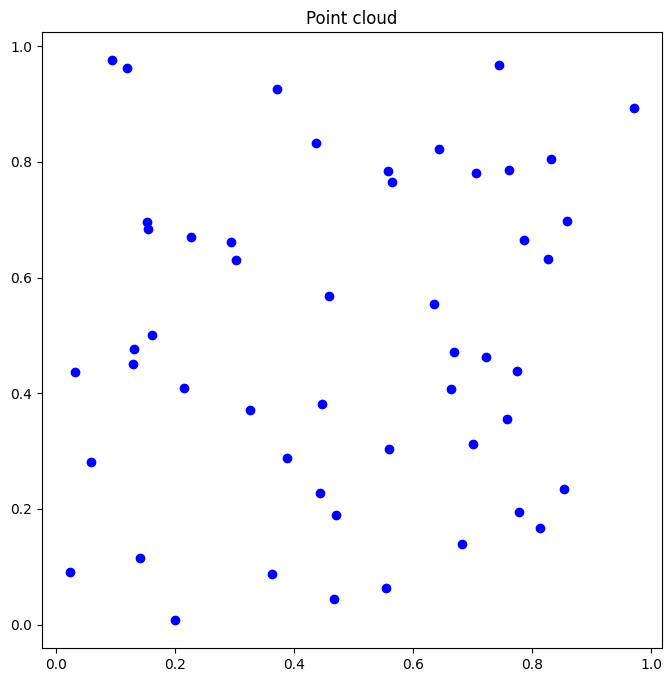

In [3]:
plot_2d_point_cloud(dataset[0], "Point cloud")

## Loading and Applying the Lifting

In [4]:
# Define transformation type and id
transform_type = "liftings"
# If the transform is a topological lifting, it should include both the type of the lifting and the identifier
transform_id = "pointcloud2graph/random_walks_lifting"

# Read yaml file
transform_config = {
    "lifting": load_transform_config(transform_type, transform_id)
    # other transforms (e.g. data manipulations, feature liftings) can be added here
}


Transform configuration for pointcloud2graph/random_walks_lifting:

{'transform_type': 'lifting',
 'transform_name': 'GraphRandomWalksLifting',
 'k': 5,
 'num_walks': 100,
 'steps_per_walk': 50,
 'feature_lifting': 'ProjectionSum'}


In [5]:
lifted_dataset = PreProcessor(dataset, transform_config, loader.data_dir)

Transform parameters are the same, using existing data_dir: datasets/pointcloud/toy_dataset/lifting/1689312665


In [6]:
describe_data(lifted_dataset)


Dataset only contains 1 sample:
 - Graph with 50 vertices and 302 edges.
 - Features dimensions: [10, 0]
 - There are 0 isolated nodes.



## Create and Run a GraphSAGE Model

In [7]:
from modules.models.graph.graphsage import GraphSAGEModel

model_type = "graph"
model_id = "graphsage"
model_config = load_model_config(model_type, model_id)

model = GraphSAGEModel(model_config, dataset_config)


Model configuration for graph GRAPHSAGE:

{'in_channels': None,
 'hidden_channels': 32,
 'out_channels': None,
 'n_layers': 2}


In [8]:
y_hat = model(lifted_dataset[0])
y_hat

/Users/nkanak/projects/challenge-icml-2024/modules/models/graph/graphsage.py:47: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return torch.nn.functional.softmax(global_mean_pool(z, None))


tensor([[0.2005, 0.7612, 0.0383]], grad_fn=<SoftmaxBackward0>)

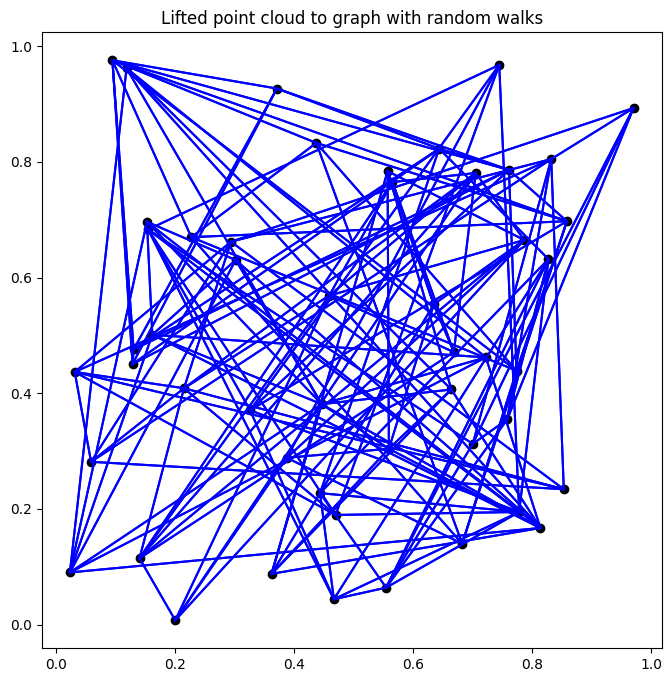

In [9]:
plot_graph_data(lifted_dataset[0], "Lifted point cloud to graph with random walks")